## **Credit card Fraud detection Project**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [3]:
df.shape

(11665, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11665 entries, 0 to 11664
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    11665 non-null  int64  
 1   V1      11665 non-null  float64
 2   V2      11665 non-null  float64
 3   V3      11665 non-null  float64
 4   V4      11665 non-null  float64
 5   V5      11665 non-null  float64
 6   V6      11665 non-null  float64
 7   V7      11665 non-null  float64
 8   V8      11665 non-null  float64
 9   V9      11665 non-null  float64
 10  V10     11665 non-null  float64
 11  V11     11665 non-null  float64
 12  V12     11664 non-null  float64
 13  V13     11664 non-null  float64
 14  V14     11664 non-null  float64
 15  V15     11664 non-null  float64
 16  V16     11664 non-null  float64
 17  V17     11664 non-null  float64
 18  V18     11664 non-null  float64
 19  V19     11664 non-null  float64
 20  V20     11664 non-null  float64
 21  V21     11664 non-null  float64
 22

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,11665.000000,11665.000000,11665.000000,11665.000000,11665.000000,11665.000000,11665.000000,11665.000000,11665.000000,11665.000000,...,11664.000000,11664.000000,11664.000000,11664.000000,11664.000000,11664.000000,11664.000000,11664.000000,11664.000000,11664.000000
mean,7701.086069,-0.219601,0.274988,0.897990,0.281016,-0.078995,0.140055,-0.111620,-0.051877,0.893589,...,-0.061180,-0.155205,-0.034310,0.017421,0.101538,0.070630,0.007481,0.000804,62.795132,0.004201
std,5964.969525,1.561122,1.305785,1.272504,1.467970,1.184333,1.305472,1.129256,1.236992,1.182130,...,0.902556,0.624275,0.508488,0.592137,0.429725,0.560307,0.406841,0.262342,179.816783,0.064681
min,0.000000,-27.670569,-34.607649,-21.405836,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-7.175097,...,-11.468435,-8.555808,-19.254328,-2.512377,-4.781606,-1.338556,-7.976100,-3.575312,0.000000,0.000000
25%,2463.000000,-0.987193,-0.257287,0.416175,-0.615559,-0.680719,-0.622413,-0.583742,-0.186419,0.181510,...,-0.268948,-0.545531,-0.172765,-0.332771,-0.146729,-0.346888,-0.080638,-0.015513,5.000000,0.000000
50%,6308.000000,-0.347783,0.262619,0.950034,0.215393,-0.179654,-0.147786,-0.088491,0.011665,0.880826,...,-0.130094,-0.129191,-0.044523,0.073145,0.139638,0.009023,-0.003818,0.015397,15.950000,0.000000
75%,11898.000000,1.159319,0.888750,1.616224,1.153380,0.348187,0.508886,0.439387,0.267067,1.570361,...,0.023295,0.235448,0.076761,0.402522,0.374859,0.417677,0.108443,0.073961,50.000000,0.000000
max,19915.000000,1.960497,9.067613,4.101716,11.927512,34.099309,21.393069,34.303177,5.499963,10.392889,...,22.599543,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


In [6]:
df.isnull().values.any()

True

In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().values.any()

False

In [10]:
df["Amount"].describe()

count    11664.000000
mean        62.795132
std        179.816783
min          0.000000
25%          5.000000
50%         15.950000
75%         50.000000
max       7712.430000
Name: Amount, dtype: float64

In [11]:
non_fraud = len(df[df.Class == 0])
fraud = len(df[df.Class ==1])
fraud_percent = (fraud / (fraud + non_fraud)) * 100
print("Number of Genuine transactions: ", non_fraud)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Fraud transactions: {:.4f}".format(fraud_percent))


Number of Genuine transactions:  11615
Number of Fraud transactions:  49
Percentage of Fraud transactions: 0.4201


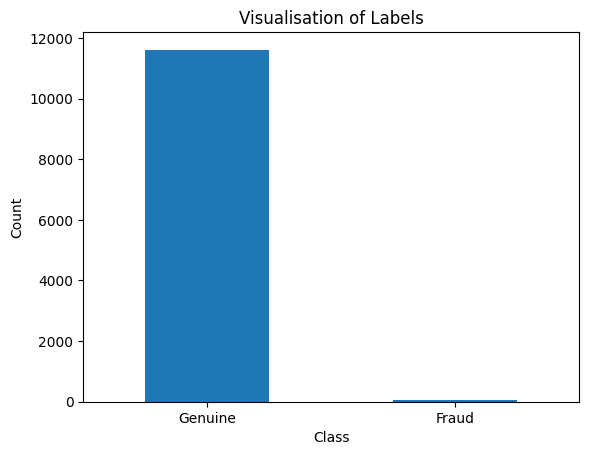

In [14]:
import matplotlib.pyplot as plt
labels = ["Genuine", "Fraud"]
count_classes = df.value_counts(df['Class'], sort=True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualisation of Labels")
plt.ylabel("Count")
plt.xticks(range(2),labels)
plt.show()


In [16]:
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df["NormalizedAmount"] = scaler.fit_transform(df["Amount"].values.reshape(-1,1))
df.drop(["Amount","Time"], inplace=True, axis=1)
Y = df["Class"]
X = df.drop(["Class"], axis=1)


In [17]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,NormalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.482873
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.334272
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.756668
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.337607
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.040014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11659,1.348167,-0.531813,0.737667,-0.312410,-1.147767,-0.585711,-0.810412,-0.062116,0.705208,0.317810,...,-0.060712,-0.120215,-0.076450,0.006995,0.489243,0.448523,-0.309831,-0.021411,-0.003987,-0.321425
11660,1.294875,-0.645847,0.689549,-0.351634,-1.026884,-0.129811,-0.928101,0.114172,0.804717,0.291495,...,-0.126197,-0.097462,-0.020893,0.040297,0.159282,0.350705,-0.278351,-0.010354,-0.008003,-0.293618
11661,1.404683,-0.554883,0.612239,-0.234956,-1.190992,-0.816824,-0.775771,-0.142637,1.121638,0.176953,...,-0.125651,-0.196110,-0.303562,0.005661,0.313352,0.473813,-0.276618,-0.024026,0.002106,-0.321425
11662,-0.945541,0.479754,1.521916,-1.298658,-0.852548,-0.604029,-0.354686,0.498106,0.407159,-0.608412,...,-0.106545,-0.050745,0.056031,-0.055584,0.312195,0.026299,-0.413466,0.189152,0.086360,-0.293618


In [22]:
from sklearn.model_selection import train_test_split
(train_X, test_X, train_Y, test_Y) = train_test_split(X, Y, test_size=0.3,random_state=42)
print("Shape of train_X:", train_X.shape)
print("Shape of test_X:", test_X.shape)


Shape of train_X: (8164, 29)
Shape of test_X: (3500, 29)


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
#Decision Tree
decision_tree = DecisionTreeClassifier()
#Random Forest
random_forest = RandomForestClassifier(n_estimators=100)


In [24]:
decision_tree.fit(train_X, train_Y)
predictions_dt = decision_tree.predict(test_X)
decision_tree_score = decision_tree.score(test_X, test_Y) * 100
random_forest.fit(train_X, train_Y)
predictions_rf = random_forest.predict(test_X)
random_forest_score = random_forest.score(test_X, test_Y) * 100
print("Random Forest Score: ", random_forest_score)
print("Decision Tree Score: ", decision_tree_score)

Random Forest Score:  99.94285714285715
Decision Tree Score:  99.8


In [25]:
predictions_dt[:20]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [26]:
predictions_rf[:20]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [27]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score
def metrics(actuals, predictions):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))


In [28]:
confusion_matrix_dt = confusion_matrix(test_Y, predictions_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt)


Confusion Matrix - Decision Tree
[[3480    4]
 [   3   13]]


In [29]:
metrics(test_Y, predictions_dt)

Accuracy: 0.99800
Precision: 0.76471
Recall: 0.81250
F1-score: 0.78788


In [30]:
confusion_matrix_rf = confusion_matrix(test_Y, predictions_rf.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_rf)

Confusion Matrix - Decision Tree
[[3484    0]
 [   2   14]]


In [31]:
metrics(test_Y, predictions_rf)

Accuracy: 0.99943
Precision: 1.00000
Recall: 0.87500
F1-score: 0.93333


accuracy of random forest is more than decision tree